$$\textbf{Blatt 10 - Praktische Optimierung - Adrian Lentz, Robert Schönewald}$$

Lösungen und Erklärungen für Blatt 10. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

In [11]:
import numpy as np
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2 
from pymoo.algorithms.moo.sms import SMSEMOA 
from pymoo.termination import get_termination
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt

# Parameter
pop_size = 20
n_offsprings = 10
n_generations = 200
n_repeats = 20

# Testprobleme
problems = ['zdt1', 'zdt3', 'dtlz2']

# Ergebnis Speicherung
results_nsga2 = {problem: [] for problem in problems}
results_sms_emoa = {problem: [] for problem in problems}

# NSGA-II Algorithmus
nsga2 = NSGA2(pop_size=pop_size, n_offsprings=n_offsprings)

# SMSEMOA Algorithmus
smsemoa = SMSEMOA(pop_size=pop_size, n_offsprings=n_offsprings)




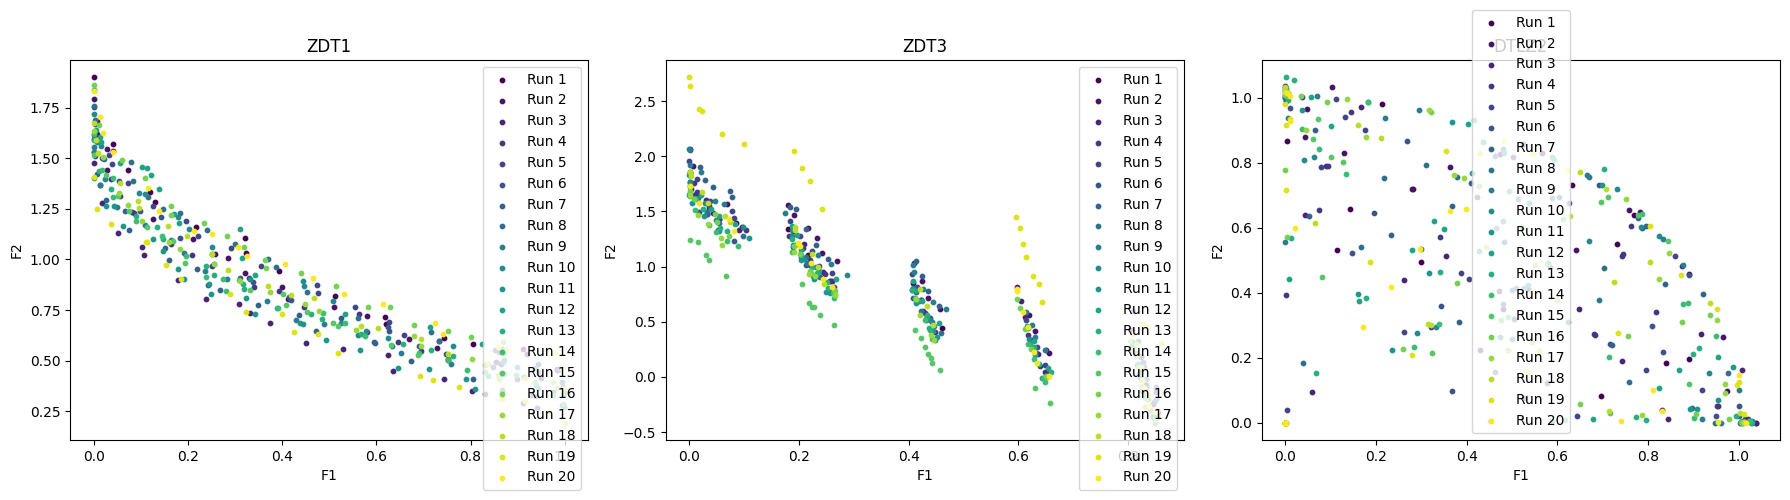

In [8]:
# NSGA-II Algorithmus
algorithm = NSGA2(pop_size=pop_size, n_offsprings=n_offsprings)
# Ergebnis Speicherung
results = {problem: [] for problem in problems}


# Optimierung und Wiederholung
for problem_name in problems:
    problem = get_problem(problem_name)
    for _ in range(n_repeats):
        res = minimize(problem,
                       algorithm,
                       get_termination("n_gen", n_generations),
                       seed=None,
                       verbose=False)
        results[problem_name].append(res.F)

# Visualisierung der Ergebnisse
fig, axs = plt.subplots(1, len(problems), figsize=(18, 5))
colors = plt.cm.viridis(np.linspace(0, 1, n_repeats))  # Farbskala für verschiedene Runs
for i, problem_name in enumerate(problems):
    for j, res in enumerate(results[problem_name]):
        axs[i].scatter(res[:, 0], res[:, 1], s=10, color=colors[j], label=f'Run {j+1}')
    axs[i].set_title(problem_name.upper())
    axs[i].set_xlabel("F1")
    axs[i].set_ylabel("F2")
    axs[i].legend()

plt.tight_layout()
plt.show()

Die drei erzeugten Grafiken zeigen die Pareto-Fronten an, welche durch den NSGA2 Alogirthmus erstellt werden für die drei verschiedenen Testdaten. Die verschiedenen Farben zeigen die unterschiedlichen Runs, wobei ersichtlich ist, dass nicht unbedingt eine Verbesserung für mehr Runs erzielt wird (s.Gelbe Punkte in 1 und 2). 
Außerdem wird klar, dass Beispiel 2(ZDT3) und 3(DTLZ2) nicht "einfache" Pareto-Fronten aufweisen.

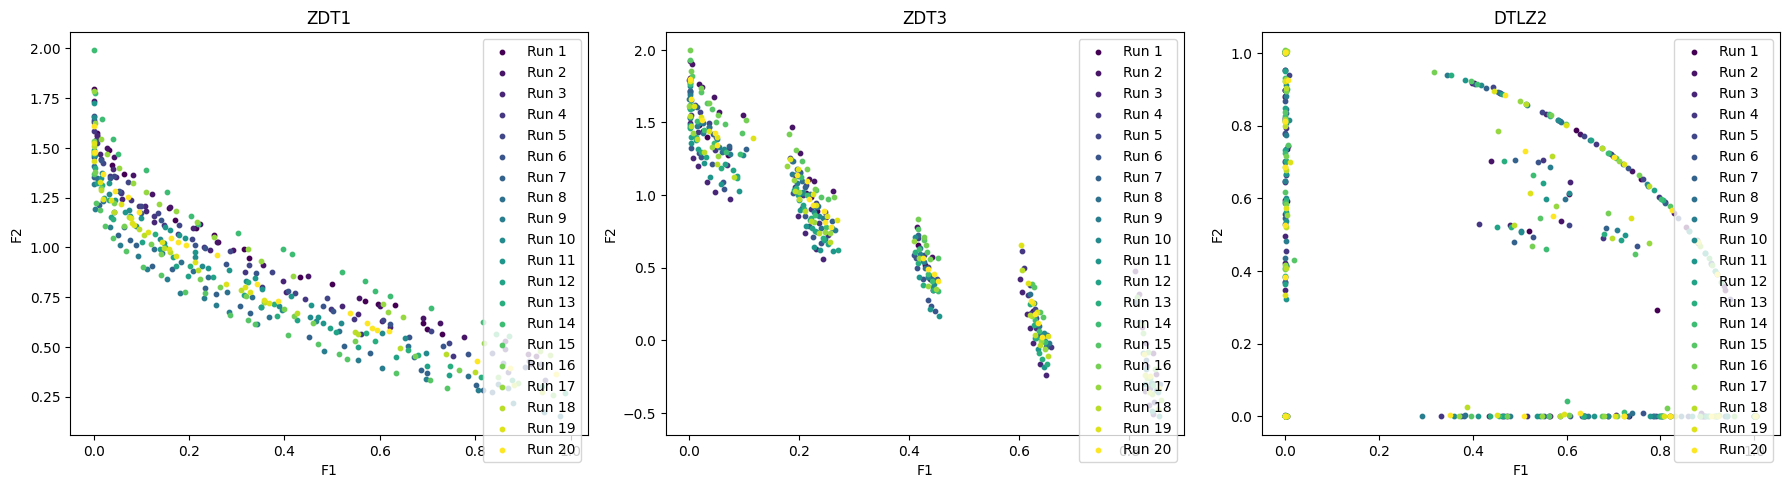

In [9]:
# SMSEMOA Algorithmus
algorithm = SMSEMOA(pop_size=pop_size, n_offsprings=n_offsprings)
# Ergebnis Speicherung
results = {problem: [] for problem in problems}

# Optimierung und Wiederholung
for problem_name in problems:
    problem = get_problem(problem_name)
    for _ in range(n_repeats):
        res = minimize(problem,
                       algorithm,
                       get_termination("n_gen", n_generations),
                       seed=None,
                       verbose=False)
        results[problem_name].append(res.F)

# Visualisierung der Ergebnisse
fig, axs = plt.subplots(1, len(problems), figsize=(18, 5))
colors = plt.cm.viridis(np.linspace(0, 1, n_repeats))  # Farbskala für verschiedene Runs
for i, problem_name in enumerate(problems):
    for j, res in enumerate(results[problem_name]):
        axs[i].scatter(res[:, 0], res[:, 1], s=10, color=colors[j], label=f'Run {j+1}')
    axs[i].set_title(problem_name.upper())
    axs[i].set_xlabel("F1")
    axs[i].set_ylabel("F2")
    axs[i].legend()

plt.tight_layout()
plt.show()


Im Gegensatz zum Algorithmus davor, erzeugt der SMSEMOA Algorithmus eine stark unterschiedliche Paretro-Front für den 3.Test-Daten Satz (DTLZ2). Die anderen beiden Paretro-Fronten erschenen stark ähnlich, ebenfalls ist zu beobachten, dass nicht immer mehr Runs für bessere Ergebnisse sorgen(gelbe Punkte).

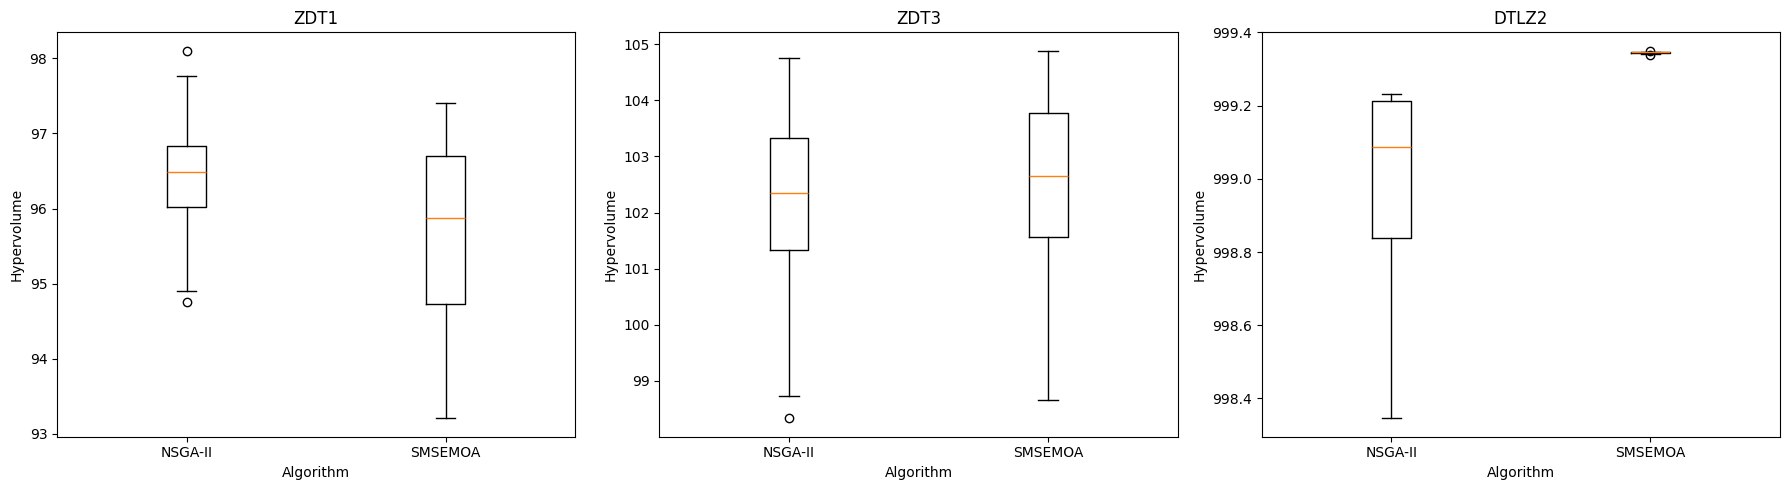

In [12]:
reference_point_2d = np.array([10, 10])
reference_point_3d = np.array([10, 10, 10])
reference_points = [reference_point_2d, reference_point_2d, reference_point_3d]

# Funktion zur Berechnung des Hypervolumens
def calculate_hypervolume(fronts, ref_point):
    hv = HV(ref_point=ref_point)
    return [hv.do(front) for front in fronts]

# NSGA-II Algorithmus
nsga2 = NSGA2(pop_size=pop_size, n_offsprings=n_offsprings)

# SMSEMOA Algorithmus
smsemoa = SMSEMOA(pop_size=pop_size, n_offsprings=n_offsprings)

# Funktion zur Berechnung des Hypervolumens
def calculate_hypervolume(fronts, ref_point):
    hv = HV(ref_point=ref_point)
    return [hv.do(front) for front in fronts]

# Optimierung und Wiederholung für NSGA-II
for problem_name, ref_point in zip(problems, reference_points):
    problem = get_problem(problem_name)
    for _ in range(n_repeats):
        res = minimize(problem,
                       nsga2,
                       get_termination("n_gen", n_generations),
                       seed=None,
                       verbose=False)
        results_nsga2[problem_name].append(res.F)

# Optimierung und Wiederholung für SMSEMOA
for problem_name, ref_point in zip(problems, reference_points):
    problem = get_problem(problem_name)
    for _ in range(n_repeats):
        res = minimize(problem,
                       smsemoa,
                       get_termination("n_gen", n_generations),
                       seed=None,
                       verbose=False)
        results_sms_emoa[problem_name].append(res.F)

# Berechnung des Hypervolumens
hv_nsga2 = {problem: calculate_hypervolume(fronts, ref_point) for problem, fronts, ref_point in zip(problems, results_nsga2.values(), reference_points)}
hv_sms_emoa = {problem: calculate_hypervolume(fronts, ref_point) for problem, fronts, ref_point in zip(problems, results_sms_emoa.values(), reference_points)}

# Boxplot der Ergebnisse
fig, axs = plt.subplots(1, len(problems), figsize=(18, 5))
for i, problem_name in enumerate(problems):
    data = [hv_nsga2[problem_name], hv_sms_emoa[problem_name]]
    axs[i].boxplot(data, labels=['NSGA-II', 'SMSEMOA'])
    axs[i].set_title(problem_name.upper())
    axs[i].set_ylabel('Hypervolume')
    axs[i].set_xlabel('Algorithm')

plt.tight_layout()
plt.show()

Durch die Berechnung des Hypervolumen können die beiden Algorithmen verglichen werden, es zeigen sich für ZDT1 und ZDT3 kaum unterschiede im Volumen, hingegen beim dritten Test Datensatz : DTLZ2 , der SMSEMOA ein größeres Hyperkugelvolumen erzielt, wodurch dieser eine besser Abdeckung der Partro-Front erzielt, als der NSGA-2. 
Außerdem ist die Varianz und Ausreißer für den SMSEMOA im dritten Test deutlich geringer als in den andern Beispielen.